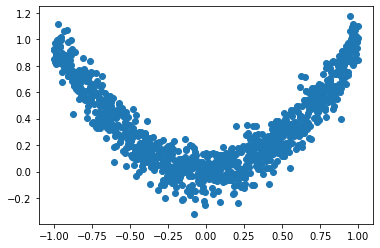

In [33]:
import torch
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
torch.manual_seed(1) 

LR = 0.01 # learning rate
BATCH_SIZE = 32 
EPOCH = 12 
 
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))
 
plt.scatter(x.numpy(), y.numpy())
plt.show()

Epoch: 1 Training...
Epoch: 2 Training...
Epoch: 3 Training...
Epoch: 4 Training...
Epoch: 5 Training...
Epoch: 6 Training...
Epoch: 7 Training...
Epoch: 8 Training...
Epoch: 9 Training...
Epoch: 10 Training...
Epoch: 11 Training...
Epoch: 12 Training...


IndexError: list index out of range

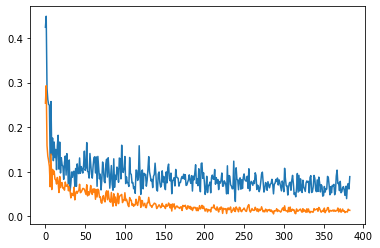

In [23]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
torch.manual_seed(1) 

LR = 0.01 # learning rate
BATCH_SIZE = 32 
EPOCH = 12 

x = torch.linspace(1, 10, 10)
y = torch.linspace(10, 1, 10)
dataset = Data.TensorDataset(x, y)


#plt.scatter(x.numpy(), y.numpy())
#plt.show()

#x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
#y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))
# torch_dataset = Data.TensorDataset(x , y )


loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE,shuffle=True, num_workers=2)


class Net(torch.nn.Module):
    def __init__( self ):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)
        self.predict = torch.nn.Linear(20, 1)
    def forward( self , x):
        x  =  F.relu(self.hidden(x))
        x  =  self.predict(x)
        return x


net_SGD = Net()
net_Momentum = Net()
nets = [net_SGD, net_Momentum]


opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
optimizers = [opt_SGD, opt_Momentum]
 
    
loss_function = torch.nn.MSELoss()
losses_history = [[], [], [], []] 
 
for epoch in range(EPOCH):
    print('Epoch:', epoch + 1, 'Training...')
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)
 
        for net, opt, l_his in zip(nets, optimizers, losses_history):
              output = net(b_x)
              loss = loss_function(output, b_y)
              opt.zero_grad()
              loss.backward()
              opt.step()
              l_his.append(loss.data)
        
labels = ['SGD', 'Momentum']
for i, l_his in enumerate(losses_history):
        plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()